In [1]:
import numpy as np
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

C:\Users\ehtes\AppData\Roaming\Python\Python310\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.2.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
data_dir = "Data"
img_height = 150
img_width = 150
batch_size = 64

In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20000 files belonging to 10 classes.
Using 16000 files for training.


In [4]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 20000 files belonging to 10 classes.
Using 4000 files for validation.


In [5]:
class_name = train_ds.class_names
class_name

['01_palm',
 '02_l',
 '03_fist',
 '04_fist_moved',
 '05_thumb',
 '06_index',
 '07_ok',
 '08_palm_moved',
 '09_c',
 '10_down']

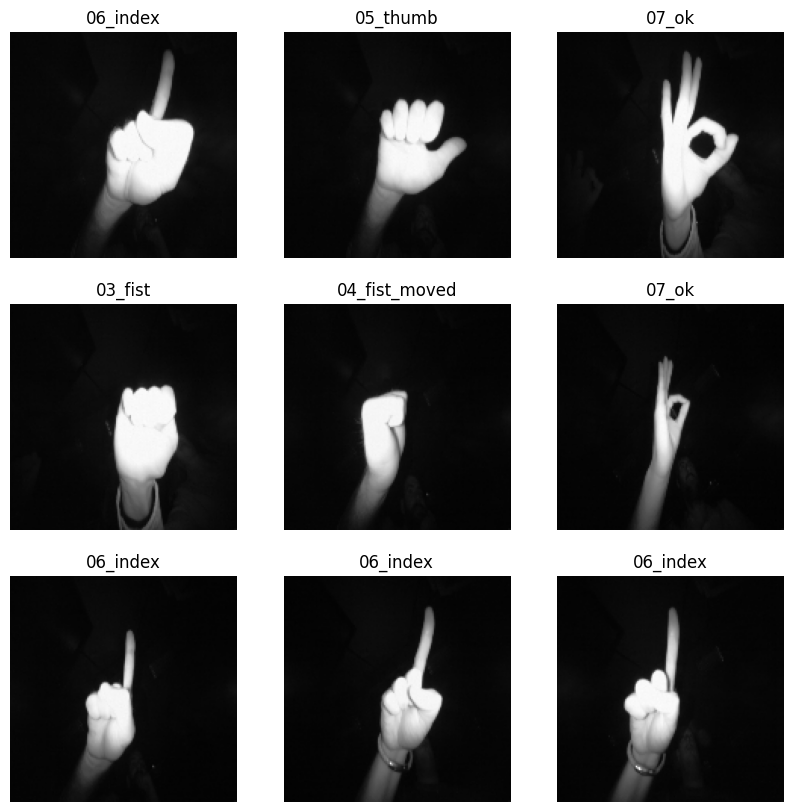

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[labels[i]])
    plt.axis("off")

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
num_classes = len(class_name)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="output")
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        1

In [11]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10


250/250 [==============================] - 181s 685ms/step - loss: 0.2340 - accuracy: 0.9291 - val_loss: 0.0286 - val_accuracy: 0.9935
Epoch 2/10
250/250 [==============================] - 150s 601ms/step - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.0010 - val_accuracy: 0.9995
Epoch 3/10
250/250 [==============================] - 194s 777ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4/10
250/250 [==============================] - 176s 703ms/step - loss: 0.0048 - accuracy: 0.9988 - val_loss: 0.0033 - val_accuracy: 0.9992
Epoch 5/10
250/250 [==============================] - 212s 847ms/step - loss: 0.0091 - accuracy: 0.9973 - val_loss: 5.3964e-04 - val_accuracy: 0.9998
Epoch 6/10
250/250 [==============================] - 151s 603ms/step - loss: 4.8057e-04 - accuracy: 0.9999 - val_loss: 7.2230e-05 - val_accuracy: 1.0000
Epoch 7/10
250/250 [==============================] - 209s 837ms/step - loss: 1.6440e-05 - accuracy: 1.0000 - val_loss: 4.8

In [12]:
model.save("image_cls.h5")

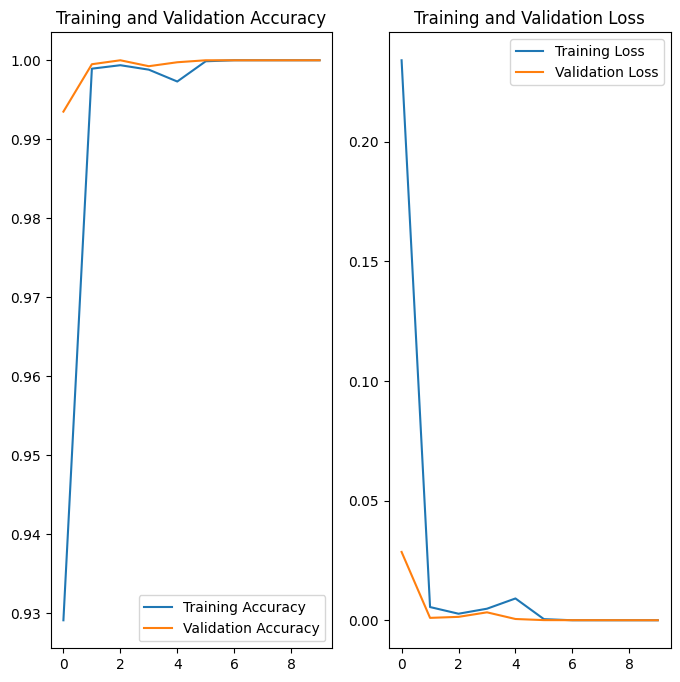

In [13]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

1/1 [==============================] - 0s 40ms/step
[[  5.46703    12.782436  -25.542576   -7.924142  -32.868496   14.49884
    7.9037895  33.092106   -3.161111    4.5633736]]
This image most likely belongs to 08_palm_moved with a 100.00 percent confidence.
